In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
cancer = load_breast_cancer()

In [3]:
X = pd.DataFrame(cancer.data, columns = cancer.feature_names)
y = pd.DataFrame(cancer.target, columns = ['target'])

In [4]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 42)

- 나이브 베이지 분류

In [5]:
naive = GaussianNB()
naive.fit(train_X, train_y)

C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

- 로지스틱 회귀

In [6]:
lgm = LogisticRegression(random_state = 7054)
lgm.fit(train_X, train_y)

C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\leeyubin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=7054)

- 결정트리

In [7]:
tree = DecisionTreeClassifier(max_depth = 2)
tree.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=2)

- ROC Curve

In [8]:
from sklearn.metrics import roc_curve

fpr_naive, tpr_naive, thresholds_naive = roc_curve(y, naive.predict_proba(X)[:, 1])
fpr_lgm, tpr_lgm, thresholds_lgm = roc_curve(y, lgm.predict_proba(X)[:, 1])
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y, tree.predict_proba(X)[:, 1])

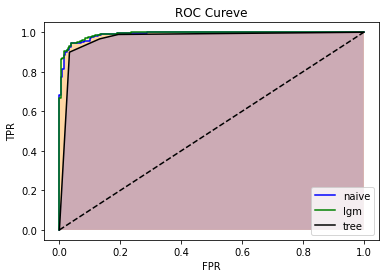

In [9]:
plt.plot(fpr_naive, tpr_naive, 'b-', label = 'naive')
plt.fill_between(fpr_naive, tpr_naive, 0, facecolor = 'red', alpha = 0.2)
plt.plot(fpr_lgm, tpr_lgm, 'g-', label = 'lgm')
plt.fill_between(fpr_lgm, tpr_lgm, 0, facecolor = 'yellow', alpha = 0.2)
plt.plot(fpr_tree, tpr_tree, 'k-', label = 'tree')
plt.fill_between(fpr_tree, tpr_tree, 0, facecolor = 'blue', alpha = 0.2)
plt.plot([0,1],[0,1],'k--')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Cureve')
plt.show()

- AUC

In [10]:
from sklearn.metrics import auc
print("naive auc : ", auc(fpr_naive, tpr_naive))
print("tree auc : ", auc(fpr_tree, tpr_tree))
print("lgm auc : ", auc(fpr_lgm, tpr_lgm))

naive auc :  0.9897204164684742
tree auc :  0.9692735584799957
lgm auc :  0.991160615189472


- 결과 해석

    유방암 데이터에 대해 나이브 베이지 분류, 로지스틱 회귀, 결정트리 분류를 진행하였다. 
    
    각 모델에 대한 성능을 AUC로 평가를 하였다. AUC는 ROC 그래프의 밑부분 면적을 의미한다.
    
    ROC 커브의 밑부분 면적이 1에 가까울수록 좋은 성능을 가진다.
    
    따라서, 로지스틱 회귀 모델이 가장 좋은 성능을 보인다고 할 수 있다.